In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
#impor modul dari library mediapipe untuk mendeteksi pose tubuh dan menggambar landmark hasil deteksi
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [3]:
def mediapipe_detection(image, model): # deteksi objek pada gambar
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results): #menggambar landmark pada gambar hasil deteksi
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #menggambar landmark wajah
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #menggambar landmark pose tubuh
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #menggambar landmark tangan kiri
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #tangan kanan 

In [5]:
def draw_styled_landmarks(image, results):
    # menggambar landmark pada wajah
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # menggambar landmark pada pose tubuh
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # menggambar landmark pada tangan kiri
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # landmark tangan kanan 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [59]:
cap = cv2.VideoCapture(0)
# mengatur model mediapipe 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Membuat deteksi
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Gambar landmark
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)

        # Keluar dari kamera
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [55]:
cap.release() #jika kamera tidak merespon, jalankan ini
cv2.destroyAllWindows()

In [60]:
draw_landmarks(frame, results)

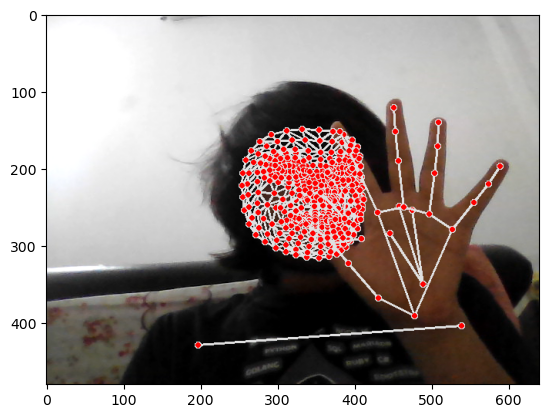

In [61]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [62]:
# ekstrak keypoint
len(results.left_hand_landmarks.landmark)

21

In [63]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [64]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [65]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [66]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [51]:
result_test = extract_keypoints(results)


In [52]:
result_test

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
468*3+33*4+21*3+21*3

1662

In [17]:
np.save('0', result_test)

In [14]:
# Setup Folder
# Path untuk exported data
DATA_PATH = os.path.join('MPDataFINAL') 

# aksi yang ingin di deteksi
actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','Siapa', 'Apa', 'Kapan', 'Berapa', 'Dimana', 'Kenapa', 'Bagaimana','Ibu','Ayah','Kakek','Nenek','marah','sedih','senang','bahagia','lelah','Kacamata','sikat gigi','baju','telepon','sisir','buku','pensil'])
# actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
# actions = np.array(['Siapa', 'Apa', 'Kapan', 'Berapa', 'Dimana', 'Kenapa', 'Bagaimana'])
# actions = np.array(['Ibu','Ayah','Kakek','Nenek'])
# actions = np.array(['marah','sedih','senang','bahagia','lelah'])
# actions = np.array(['Kacamata','sikat gigi','baju','telepon','sisir','buku','pensil'])

no_sequences = 30

sequence_length = 30

In [15]:
 for action in actions: #membuat direktori pada path yang telah di define di atas
        for sequence in range(no_sequences):
            try:
                os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            except:
                pass

In [29]:
cap = cv2.VideoCapture(0) # input data berdasarkan aksi
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Keluar dari kamera
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


In [33]:
cap.release()
cv2.destroyAllWindows()

In [16]:
# Praproses Data dan Buat Label dan Fitur
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [17]:
label_map = {label:num for num, label in enumerate(actions)}

In [18]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'Siapa': 26,
 'Apa': 27,
 'Kapan': 28,
 'Berapa': 29,
 'Dimana': 30,
 'Kenapa': 31,
 'Bagaimana': 32,
 'Ibu': 33,
 'Ayah': 34,
 'Kakek': 35,
 'Nenek': 36,
 'marah': 37,
 'sedih': 38,
 'senang': 39,
 'bahagia': 40,
 'lelah': 41,
 'Kacamata': 42,
 'sikat gigi': 43,
 'baju': 44,
 'telepon': 45,
 'sisir': 46,
 'buku': 47,
 'pensil': 48}

In [19]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [20]:
np.array(sequences).shape

(1470, 30, 1662)

In [21]:
np.array(labels).shape

(1470,)

In [22]:
X = np.array(sequences)

In [23]:
X.shape

(1470, 30, 1662)

In [24]:
y = to_categorical(labels).astype(int)

In [25]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [27]:
y_test.shape

(147, 49)

In [28]:
# Membangun dan Melatih LSTM Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [334]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
res

array([ 0.51878536,  0.45537695, -1.02007639, ...,  0.10583732,
        0.70802325, -0.10523029])

In [73]:
actions[np.argmax(res)]

'telepon'

In [282]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [293]:
model.fit(X_train, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
44/44 [==============================] - 19s 423ms/step - loss: 0.0658 - categorical_accuracy: 0.9821
Epoch 2/10
44/44 [==============================] - 19s 426ms/step - loss: 0.0532 - categorical_accuracy: 0.9878
Epoch 3/10
44/44 [==============================] - 19s 424ms/step - loss: 0.0617 - categorical_accuracy: 0.9821
Epoch 4/10
44/44 [==============================] - 19s 442ms/step - loss: 0.0802 - categorical_accuracy: 0.9706
Epoch 5/10
44/44 [==============================] - 19s 436ms/step - loss: 0.1213 - categorical_accuracy: 0.9491
Epoch 6/10
44/44 [==============================] - 19s 432ms/step - loss: 0.2222 - categorical_accuracy: 0.9262
Epoch 7/10
44/44 [==============================] - 19s 433ms/step - loss: 0.0773 - categorical_accuracy: 0.9764
Epoch 8/10
44/44 [==============================] - 19s 437ms/step - loss: 0.0812 - categorical_accuracy: 0.9706
Epoch 9/10
44/44 [==============================] - 19s 438ms/step - loss: 0.2668 - categorical_

In [294]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 49)                1617      
                                                                 
Total params: 598193 (2.28 MB)
Trainable params: 59819

In [295]:
# membuat prediksi 
res = model.predict(X_test)

3/3 [==============================] - 0s 131ms/step


In [94]:
actions[np.argmax(res[5])]

'A'

In [93]:
actions[np.argmax(y_test[5])]

'U'

In [244]:
#menyimpan model
model.save('action.h5')

C:\Users\julia\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
del model

In [39]:
model.load_weights('action_FINAL.h5')

In [40]:
# elavuasi menggunakan Confusion Matrix dan akurasi
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [41]:
yhat = model.predict(X_test)

5/5 [==============================] - 1s 24ms/step


In [42]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [43]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[144,   0],
        [  0,   3]],

       [[141,   0],
        [  1,   5]],

       [[142,   0],
        [  0,   5]],

       [[145,   0],
        [  0,   2]],

       [[146,   0],
        [  0,   1]],

       [[145,   0],
        [  0,   2]],

       [[144,   0],
        [  0,   3]],

       [[145,   1],
        [  0,   1]],

       [[142,   0],
        [  1,   4]],

       [[144,   1],
        [  0,   2]],

       [[143,   0],
        [  0,   4]],

       [[145,   0],
        [  1,   1]],

       [[146,   0],
        [  1,   0]],

       [[142,   1],
        [  0,   4]],

       [[144,   0],
        [  0,   3]],

       [[142,   1],
        [  0,   4]],

       [[143,   0],
        [  0,   4]],

       [[143,   1],
        [  0,   3]],

       [[142,   0],
        [  0,   5]],

       [[145,   0],
        [  0,   2]],

       [[145,   0],
        [  0,   2]],

       [[144,   0],
        [  0,   3]],

       [[145,   0],
        [  0,   2]],

       [[139,   0],
        [  1, 

In [45]:
accuracy_score(ytrue, yhat) #nilai akurasi, sering berubah awalnya 0.82 lalu 0.4 dan sekarang 0.9

0.9659863945578231

In [47]:
colors = [(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16), (117,245,16), (16,117,245), (16,117,245), (16,117,245), (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245)]
# membuat output dan prediksi aksi
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    num_sets = 3  # Define the number of sets
    set_size = len(actions) // num_sets
    
    for set_num in range(num_sets):
        set_actions = actions[set_num * set_size: (set_num + 1) * set_size]
        set_colors = colors[set_num * set_size: (set_num + 1) * set_size]
        
        for num, prob in enumerate(res[set_num * set_size: (set_num + 1) * set_size]):
            cv2.rectangle(output_frame, (set_num * 300, 60 + num * 40), (set_num * 300 + int(prob * 100), 90 + num * 40),
                          set_colors[num], -1)
            cv2.putText(output_frame, set_actions[num], (set_num * 300, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame

In [68]:
sequence = [] #deteksi
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cv2.namedWindow('OpenCV Feed', cv2.WINDOW_NORMAL)
    cv2.setWindowProperty('OpenCV Feed', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [70]:
 cap.release()
cv2.destroyAllWindows()

In [72]:
from tensorflow.keras.models import load_model #kode apabila ingin langsung jalan semua
import cv2
import mediapipe as mp
import numpy as np

actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','Siapa', 'Apa', 'Kapan', 'Berapa', 'Dimana', 'Kenapa', 'Bagaimana','Ibu','Ayah','Kakek','Nenek','marah','sedih','senang','bahagia','lelah','Kacamata','sikat gigi','baju','telepon','sisir','buku','pensil'])
model = load_model('action_FINAL.h5')

mp_holistic = mp.solutions.holistic # melacak keypoint badan
mp_drawing = mp.solutions.drawing_utils # Menggambar keypoint di badan kita

def predict_gesture(model, sequence):
    res = model.predict(np.expand_dims(sequence, axis=0))[0]
    return actions[np.argmax(res)]

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

def mediapipe_detection(image, holistic):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image.flags.writeable = False
    results = holistic.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  
    return image, results

def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Gambar koneksi pose
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Gambar sambungan tangan kiri
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Gambar sambungan tangan kanan 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

colors = [(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16), (117,245,16), (16,117,245), (16,117,245), (16,117,245), (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245),  (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    num_sets = 4  # Define the number of sets
    set_size = len(actions) // num_sets
    
    for set_num in range(num_sets):
        set_actions = actions[set_num * set_size: (set_num + 1) * set_size]
        set_colors = colors[set_num * set_size: (set_num + 1) * set_size]
        
        for num, prob in enumerate(res[set_num * set_size: (set_num + 1) * set_size]):
            cv2.rectangle(output_frame, (set_num * 300, 60 + num * 40), (set_num * 300 + int(prob * 100), 90 + num * 40),
                          set_colors[num], -1)
            cv2.putText(output_frame, set_actions[num], (set_num * 300, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame

sequence = []
sentence = []
threshold = 0.8
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cv2.namedWindow('OpenCV Feed', cv2.WINDOW_NORMAL)
    cv2.setWindowProperty('OpenCV Feed', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [71]:
from tensorflow.keras.models import load_model #jika hanya ingin mendeteksi abjad bisindo
import cv2
import mediapipe as mp
import numpy as np

model = load_model('action.h5')
actions = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']  # Replace with your actual gesture/action labels

mp_holistic = mp.solutions.holistic # melacak keypoint badan
mp_drawing = mp.solutions.drawing_utils # Menggambar keypoint di badan kita

def predict_gesture(model, sequence):
    res = model.predict(np.expand_dims(sequence, axis=0))[0]
    return actions[np.argmax(res)]

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

def mediapipe_detection(image, holistic):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False
    results = holistic.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  
    return image, results

def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Gambar koneksi pose
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Gambar sambungan tangan kiri
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Gambar sambungan tangan kanan 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

colors = [(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    half = len(actions) // 2
    actions1 = actions[:half]
    actions2 = actions[half:]
    for num, prob in enumerate(res):
        if num < half:
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
            cv2.putText(output_frame, actions1[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        else:
            cv2.rectangle(output_frame, (300,60+(num-half)*40), (300+int(prob*100), 90+(num-half)*40), colors[num], -1)
            cv2.putText(output_frame, actions2[num-half], (300, 85+(num-half)*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

sequence = []
sentence = []
threshold = 0.8
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cv2.namedWindow('OpenCV Feed', cv2.WINDOW_NORMAL)
    cv2.setWindowProperty('OpenCV Feed', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # untuk keluar kamera
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 29ms/step
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 28ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 31ms/step
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 28ms/step
Z
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Z
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Z
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Z
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Z
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Z
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Z
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Z
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Z
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1